In [512]:
#  Активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing

In [513]:
url = "https://raw.githubusercontent.com/Olga225/ITMO_Data_Analysis/refs/heads/main/Econom_Cities_data.csv"
df = pd.read_csv(url, sep=";", index_col='City')

В наборе данных два столбца Prace и Salary подразумеваются как числовые (проценты), однако записаны как строки формата 'x,f', что требует корректировки и приведения типов.

Также посмотрим общие характеристики данных и полный набор данных, т.к. его размер относительно невелик.

In [514]:
df['Price'] = (df['Price'].apply(lambda x: x.replace(',','.'))).astype(float)
df['Salary'] = (df['Salary'].apply(lambda x: x.replace(',','.'))).astype(float)

print(df.describe())
print(df.head())

              Work       Price       Salary
count    48.000000   48.000000    48.000000
mean   1384.958333   68.860417  -378.727083
std    2404.897007   21.784659  2027.338052
min   -9999.000000   30.300000 -9999.000000
25%    1740.750000   49.650000    12.250000
50%    1834.500000   70.500000    40.300000
75%    1972.750000   81.700000    58.700000
max    2375.000000  115.500000   100.000000
           Work  Price  Salary
City                          
Amsterdam  1714   65.6    49.0
Athens     1792   53.8    30.4
Bogota     2152   37.9    11.5
Bombay     2052   30.3     5.3
Brussels   1708   73.8    50.5


In [515]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

Из полученной информации видно, что в двух строках в столбцах Work и Salary присутствуют, вероятно, пропуски, замененные на -9999.

Построим графики распределения Work, Price и Salary до и после удаления строк с пропущенными зачениями.

(array([3., 6., 6., 5., 8., 7., 5., 3., 1., 4.]),
 array([ 30.3 ,  38.82,  47.34,  55.86,  64.38,  72.9 ,  81.42,  89.94,
         98.46, 106.98, 115.5 ]),
 <BarContainer object of 10 artists>)

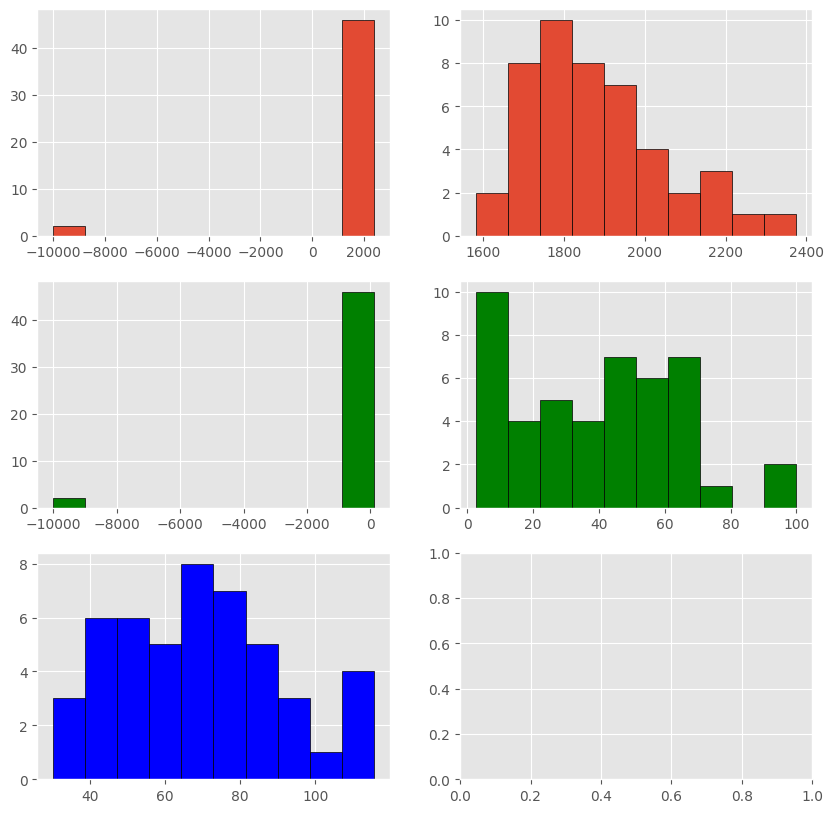

In [516]:
figure, axis = plt.subplots(3, 2, figsize=(10, 10))

axis[0, 0].hist(df['Work'], edgecolor = 'black')
axis[0, 1].hist(df[df['Work'] > -9999]['Work'], edgecolor = 'black')

axis[1, 0].hist(df['Salary'], edgecolor = 'black', color = 'green')
axis[1, 1].hist(df[df['Salary'] > -9999]['Salary'], edgecolor = 'black', color = 'green')

axis[2, 0].hist(df['Price'], edgecolor = 'black', color = 'blue')


In [517]:
print(f"Пропущенных значений в Work: {len(df[df['Work'] <= -9999])}, {round(len(df[df['Work'] <= -9999]) / len(df), 3) * 100}%")
print(f"Пропущенных значений в Salary: {len(df[df['Salary'] <= -9999])}, {round(len(df[df['Salary'] <= -9999]) / len(df), 3) * 100}%")

Пропущенных значений в Work: 2, 4.2%
Пропущенных значений в Salary: 2, 4.2%


После удаления пропущенных значений оценим вновь характеристики набор данных.

In [518]:
df = df[(df['Work'] > -9999) & (df['Salary'] > -9999)]
print(df.describe())

              Work       Price      Salary
count    46.000000   46.000000   46.000000
mean   1879.913043   70.100000   39.545652
std     174.342552   21.389177   24.757703
min    1583.000000   30.300000    2.700000
25%    1745.250000   51.775000   14.375000
50%    1849.000000   70.950000   43.650000
75%    1976.250000   81.900000   59.700000
max    2375.000000  115.500000  100.000000


Проведем нормировку данных.

In [519]:
stand_1 = preprocessing.StandardScaler()
#stand_1 = preprocessing.MaxAbsScaler()
#stand_1 = preprocessing.MinMaxScaler()

stand_1.fit(df)
X = stand_1.transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [520]:
print(X.head())

               Work     Price    Salary
City                                   
Amsterdam -0.962166 -0.212712  0.386095
Athens    -0.509827 -0.770489 -0.373488
Bogota     1.577891 -1.522069 -1.145323
Bombay     0.997969 -1.881316 -1.398517
Brussels  -0.996961  0.174896  0.447351


Проведем кластеризацию.



In [521]:
link = linkage(X, 'ward', 'euclidean')
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(45, 4)


In [522]:
print(link[:15])

[[20.         33.          0.13000932  2.        ]
 [26.         44.          0.20992596  2.        ]
 [25.         28.          0.24101549  2.        ]
 [ 6.         37.          0.26638013  2.        ]
 [ 4.         39.          0.27962161  2.        ]
 [ 2.         17.          0.28619313  2.        ]
 [ 7.         43.          0.31145704  2.        ]
 [10.         11.          0.31305006  2.        ]
 [ 1.         30.          0.3489377   2.        ]
 [18.         34.          0.38756772  2.        ]
 [ 0.         50.          0.419298    3.        ]
 [12.         45.          0.44645167  2.        ]
 [ 9.         46.          0.45306282  3.        ]
 [36.         54.          0.4905399   3.        ]
 [13.         31.          0.50930475  2.        ]]


Построим дендрограмму

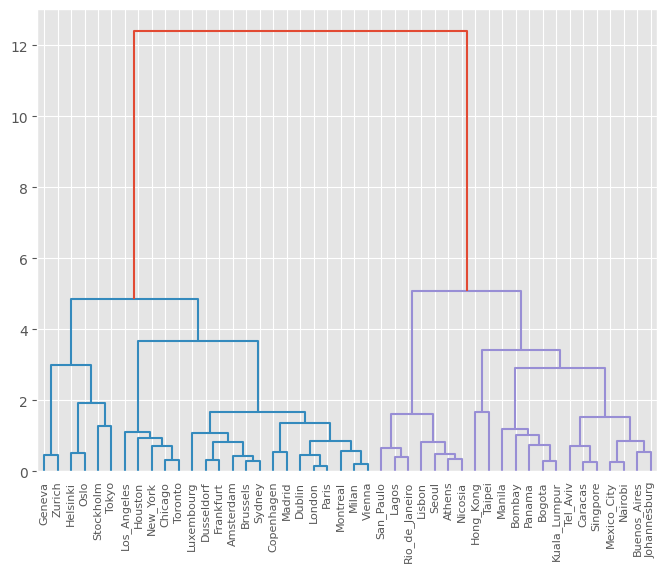

In [523]:
fig = plt.figure(figsize=(8,6))
dn = dendrogram(link, labels= df.index.tolist())

Посмотрим "каменистую осыпь".

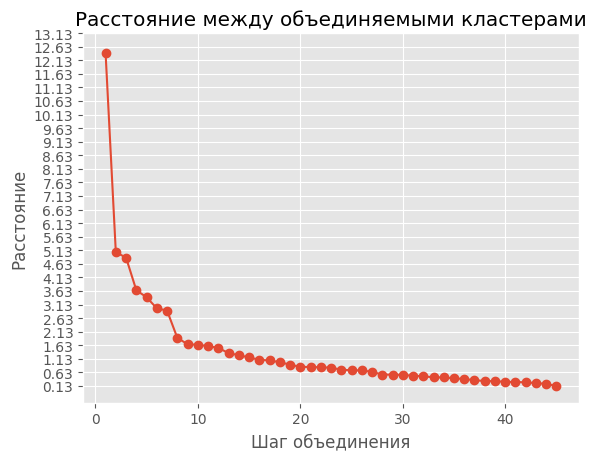

In [524]:
dist = link[:, 2]
dist

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

plt.yticks(np.arange(min(dist[::-1]), max(dist[::-1])+1, 0.5))

plt.show()

Определим "порог" расстояния в 4 согласно полученной информации.

In [525]:
h = 4

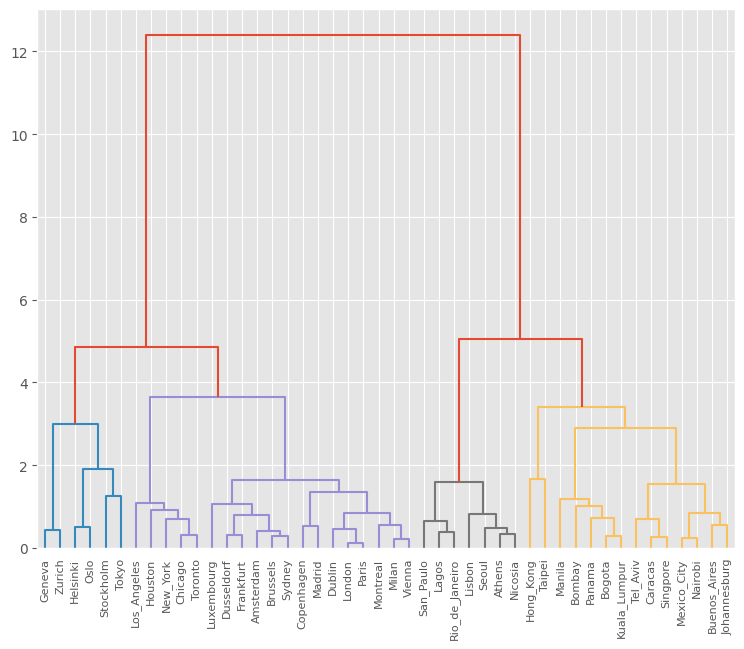

In [526]:
fig = plt.figure(figsize=(9,7))

dn = dendrogram(link, color_threshold = h, labels=df.index.tolist())

Таким образом, получаем 4 кластера. Добавим столбец кластера в набор данных и оценим содержимое согласное по средним значениям столбцов.

In [527]:
df['cluster'] = fcluster(link, h, criterion='distance')


In [528]:
print(df.sort_values(by = 'cluster'))

                Work  Price  Salary  cluster
City                                        
Geneva          1880   95.9    90.3        1
Helsinki        1667  113.6    66.6        1
Oslo            1583  115.5    63.7        1
Stockholm       1805  111.3    39.2        1
Tokyo           1880  115.0    68.0        1
Zurich          1868  100.0   100.0        1
Dublin          1759   76.0    41.4        2
Amsterdam       1714   65.6    49.0        2
Houston         1978   71.9    46.3        2
Dusseldorf      1693   78.5    60.2        2
New_York        1942   83.3    65.8        2
Milan           1773   82.0    53.3        2
Luxembourg      1768   71.1    71.1        2
Copenhagen      1717   91.3    62.9        2
Chicago         1924   73.9    61.9        2
Brussels        1708   73.8    50.5        2
Montreal        1827   72.7    56.3        2
London          1737   84.2    46.2        2
Vienna          1780   78.0    51.3        2
Toronto         1888   70.2    58.2        2
Paris     

In [529]:
df.describe()

,Work,Price,Salary,cluster
count,46.000000,46.000000,46.000000,46.000000
mean,1879.913043,70.100000,39.545652,2.630435
std,174.342552,21.389177,24.757703,1.061628
min,1583.000000,30.300000,2.700000,1.000000
25%,1745.250000,51.775000,14.375000,2.000000
50%,1849.000000,70.950000,43.650000,2.000000
75%,1976.250000,81.900000,59.700000,4.000000
max,2375.000000,115.500000,100.000000,4.000000


In [530]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1798.857143,50.942857,19.214286
4,2082.357143,53.121429,14.914286


Интерпретация:

**Кластер 1.** Экономические центры. Умеренное среднее время работы, очень высокие ценами и высокие зарплатами. Скорее всего, представляют собой дорогие для жизни города с высоким уровнем жизни.

**Кластер 2.** Развитые города. Умеренное среднее время работы, высокие цены и зарплаты: ниже, чем в первом кластере, но выше медианных. Вероятно, обладают сильной сбалансированной экономикой.

**Кластер 3.** Развивающиеся города. Умеренное среднее время работы, умеренные цены и невысокие зарплаты. Скорее всего, обладают активно растущей экономикой, на что указывает несбалансированный индекс цен и запрлат.

**Кластер 4.** Города с экономическими проблемами. Очень высокое среднее время работы, низкие цены и зарплаты. Скорее всего, имеют несбалансированную экономику и худшее качество жизни по сравнению с остальными кластерами.